### Домашнее задание

#### Аугментация изображений

Применить различные методы аугментации для работы с изображениями с использованием библиотеки `torchvision`. Цель — улучшить вариативность данных и повысить устойчивость будущих модели. Выбрать **5 аугментаций** из документации библиотеки `torchvision` - https://pytorch.org/vision/stable/transforms.html, применить их и сделайть выводы.

#### Примеры аугментаций

1. **Resize**: Изменение размера изображения до указанного размера.
2. **RandomShortestSize**: Преобразование размера изображения до случайной минимальной стороны, оставляя пропорции.
3. **RandomHorizontalFlip**: Случайное отражение изображения по горизонтали с вероятностью 50%.
4. **Pad**: Добавление паддинга (отступов) вокруг изображения.
5. **RandomAffine**: Случайное аффинное преобразование (масштабирование, повороты, смещения).
6. **RandomSolarize**: Солнечная коррекция изображения, которая меняет яркость пикселей выше определённого порога.
7. **ColorJitter**: Изменение яркости, контраста и насыщенности изображения.
8. **RandomRotation**: Случайное вращение изображения на угол от 0 до 30 градусов.
9. **RandomCrop**: Случайное обрезание изображения до меньшего размера.
10. **GaussianBlur**: Применение гауссового размытия.

#### Инструкция

1. **Выбор аугментаций.** Из списка выше или официальной документации библиотеки `torchvision` выбрать 5 различных аугментаций. Постараться выбрать различные типы аугментаций (например, изменение размера, поворот, цветовая коррекция и т.д.).
2. **Реализовать пайплайн аугментаций**
   - Использовать класс библиотеки `torchvision.transforms`, чтобы создать пайплайн аугментаций, который будет применяться к изображению.
   - Применять аугментации к изображению и отображать его перед и после изменений.
3. **Вывод.** Написать выводы.

### Решение

#### Импорты

In [1]:
import torch

from torchvision.transforms import functional as F
from torchvision.transforms import v2

from PIL import Image

#### Исходная картинка + приведение к стандартному размеру

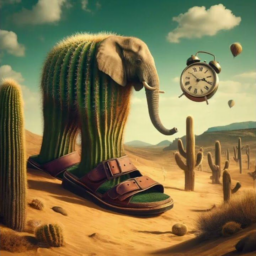

In [2]:
img_to_tensor = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((256, 256)),
])

img_tensor = None
with Image.open('data/lirili_larila.jpg') as img:
    img_tensor = img_to_tensor(img)

F.to_pil_image(img_tensor)

#### Применение аугментаций

RandomAffine


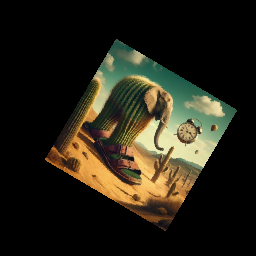

ColorJitter


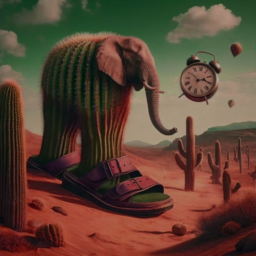

RandomCrop


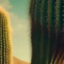

Normalize


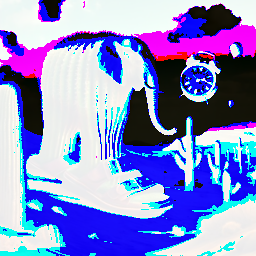

GaussianBlur


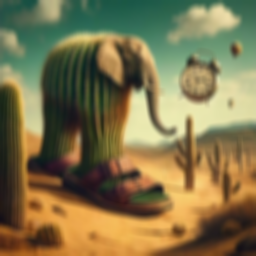

In [3]:
transforms = {
    "RandomAffine": v2.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75)),
    "ColorJitter": v2.ColorJitter(brightness=.5, hue=.3),
    "RandomCrop": v2.RandomCrop(size=(64, 64)),
    "Normalize": v2.Normalize(mean=[0.5], std=[5.]),
    "GaussianBlur": v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
}

for name, transform in transforms.items():
    print(name)
    display(F.to_pil_image(transform(img_tensor)))

#### Пайплайн аугментаций

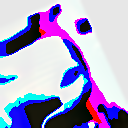

In [4]:
transforms_pipeline = v2.Compose([
    v2.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75)),
    v2.ColorJitter(brightness=.5, hue=.3),
    v2.RandomCrop(size=(128, 128)),
    v2.Normalize(mean=[0.5], std=[5.]),
    v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
])

F.to_pil_image(transforms_pipeline(img_tensor))

#### Выводы

Аугментации действительно помогают при небольших датасетах.  
- Поворот изображения позволит модели не различать зеркальные отражения одного и того же объекта (например для кошек нет разницы смотрит она слева направо или наоборт, а вот для букв - есть)
- Затенение и осветление изображения поможет модели не отвлекаться на светлость, а обращать внимание на очертания
- Обрезание изображения поможет модели при неполных картинках (например если изображение содержит кота, а хвост за другим объектом, то модель все равно определит кота)
- Нормализация поможет привести все пиксели в один диапазон, но при этом сохранить границы
- Размытие поможет модели смотреть на картину целиком

Композиции аугментаций также позволяют увеличить размер датасета и исключить переобучения под конкретный сценарий